# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: lunes 7 de noviembre 13 horas


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 

In [6]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
azul= sns.xkcd_rgb['dark sky blue']
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize




def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [7]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [8]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [9]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [10]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)


[100, 100, 100, 100]
[100, 4.650323545792823, 100, 195.34967645420718]
[49.78815436712759, 4.650323545792823, 150.2118456328724, 195.34967645420718]
[49.78815436712759, 67.082123290346, 87.78004588831922, 195.34967645420718]
[154.42062811399234, 67.082123290346, 87.78004588831922, 90.71720270734245]
[154.42062811399234, 67.082123290346, 53.97078052711406, 124.52646806854763]
[135.37779942835434, 67.082123290346, 53.97078052711406, 143.56929675418561]
[135.37779942835434, 113.42321429426522, 53.97078052711406, 97.2282057502664]
[135.37779942835434, 71.08661425032022, 96.30738057105907, 97.2282057502664]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [11]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           


   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.9   54   74  100  125  147
 20,000 0.49  98.3    1   11   70  229  441
 40,000 0.50 100.3    1   11   70  228  478
 60,000 0.50 100.3    1   10   70  229  461
 80,000 0.50 101.0    1   11   69  227  473
100,000 0.50 101.4    1   10   69  228  471
120,000 0.50  99.0    1   11   69  227  450
140,000 0.50 100.1    1   11   71  225  465
160,000 0.50 101.1    1   12   70  228  465
180,000 0.50  99.7    1   11   70  227  479
200,000 0.50  98.6    1   11   70  230  462


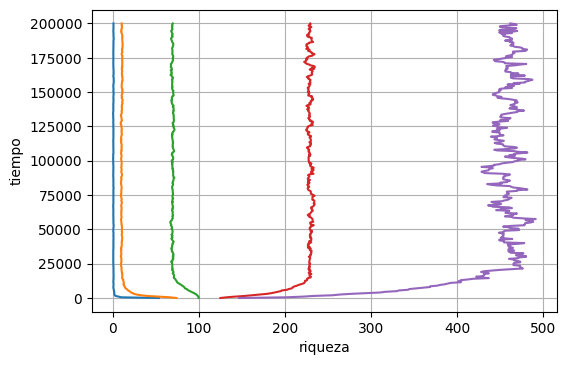

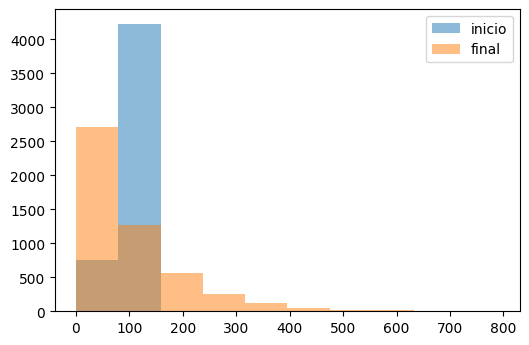

In [12]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

In [13]:
calculagini = gini(pop)
calculagini

0.12112148794581845

## Desarrollo Parte I
#### (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?

In [57]:
#población de 10000 actores, con $10000 cada uno inicialmente y 1000 iteraciones:
giniCalculado = []
for i in range(50,1000,50):
    cont=0
    for pop in simula([i] * 4, 10000):
        cont=cont+1
    #Tomaremos la ultima simulación (pop)
    #print(pop)
    giniPOP = gini(pop)
    giniCalculado.append(giniPOP)
#print(giniCalculado)


In [58]:
for i in range(len(giniCalculado)):
    if(giniCalculado[i]==min(giniCalculado)):
        print('el minimo es:')
        print(min(giniCalculado))
        print(" y su posición valor inicial es: ")
        print((i+1)*50)
    elif(giniCalculado[i]==max(giniCalculado)):
        print('el maximo es:')
        print(max(giniCalculado))
        print(" y su posición valor inicial es: ")
        print((i+1)*50)



el minimo es:
0.2283492387498185
 y su posición valor inicial es: 
850
el maximo es:
0.5365223895196765
 y su posición valor inicial es: 
900


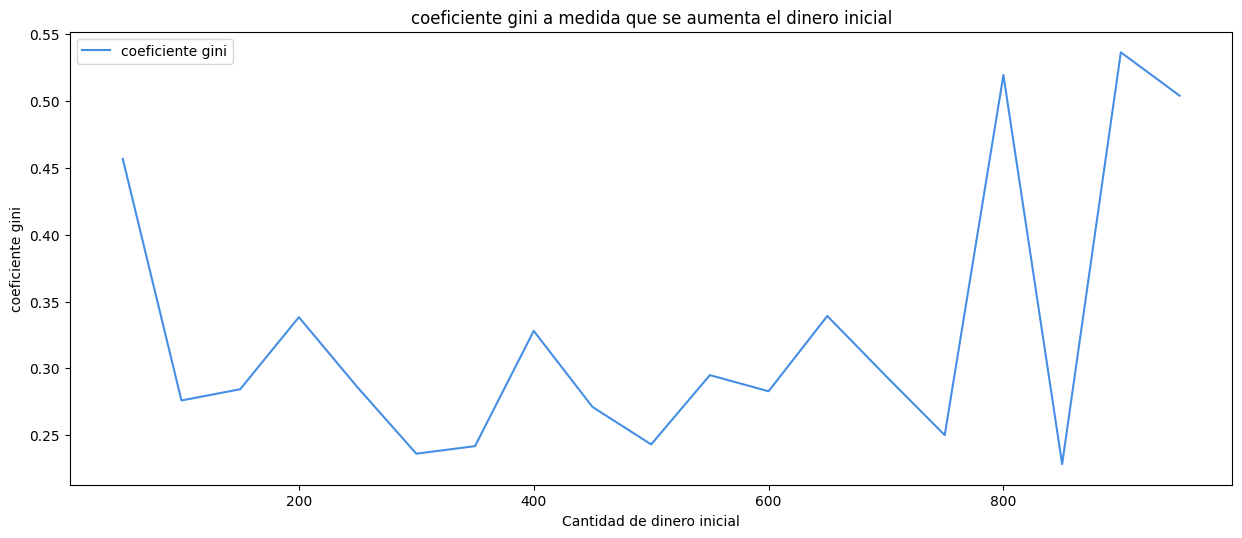

In [60]:

#Graficamos La esperanza teorica y empirica
plt.figure(figsize=(15, 6))
n_range = np.arange(50,1000, 50)
plt.plot(n_range, giniCalculado, color=azul)

# info gráfica
plt.legend(['coeficiente gini'])
plt.title('coeficiente gini a medida que se aumenta el dinero inicial')
plt.xlabel('Cantidad de dinero inicial')
plt.ylabel('coeficiente gini')
plt.show();

### <b> Respuesta i)a)</b>
Se decidió mantener los 4 actores y solo variar la cantidad de dinero inicial, empezando desde 50, hasta 1000 con un salto de 50.
Con esto podemos analizar los valores, después de muchas simulaciones e intentos a este mismo proceso, se puede concluir que para esta simulación el valor inicial no afecta el resultado final de manera significativa, ya que depende completamente de la aleatoriedad de las transacciones dentro de la función simula.

El Coeficiente gini se comporta de tal manera que su valor va desde 0 a 1, donde 0 significa que los salarios son todos iguales y la distribución es totalmente equitativa, y 1 significa que un solo actor posee todo y el resto nada.
En base a eso, a medida que más cercano sea su valor a 0, la riqueza es más equitativa y mientras más se aleje es menos equitativa.

Teniendo lo anterior en cuenta y comparando los resultados de las simulaciones con el mundo real, tenemos que el mínimo es 0.228 y el máximo es 0.536, esto indica que:
    Para el máximo: Al ser un número tan alto de desigualdad (0.536), se acerca a países como Colombia, Surinam, Sudáfrica, etc. Paises del tercer mundo.
    Para el mínimo: Se acerca a paises como Islandia,Noruega, Suecia, Eslovaquia, paises conocidos por su gran calidad de vida y altos salarios mínimos.

fuente: https://datosmacro.expansion.com/demografia/indice-gini

####   (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


## Parte II: 
### 0. Indique la fuente de sus datos.
<p>Los datos fueron sacados de <a href="https://datosabiertos.mineduc.cl/notas-de-ensenanza-media-y-percentil-jovenes/">datos abiertos mineduc 2021</a>. Se encuentra la información de las notas de enseñanza media y percentil de los estudiantes en educación regular.</p>
<p>El dataframe contiene:</p>
<ul>
<li><b>RBD:</b> Rol Base de Datos del establecimiento -> 0 - 99999</li>
<li><b>COD_DEPE:</b> Dependencia administrativa -> 0 - 6</li>
<li><b>AGNO_EGRESO:</b> Año egreso del alumno.</li>
<li><b>MRUN:</b> Máscara del RUN del alumno.</li>
<li><b>NEM:</b> Notas de enseñanza media del alumno -> 4.25 - 7.0</li>
<li><b>PERCENTIL:</b> Percentil asociado al NEM del alumno -> 0 - 100</li>
<li><b>PUESTO_10:</b> Dentro del 10% de estudiantes con mejor promedio de egreso -> SI/NO</li>
<li><b>PUESTO_30:</b> Dentro del 30% de estudiantes con mejor promedio de egreso -> SI/NO</li>
</ul>
<p>Como punto de interés se considerará el <b>NEM</b></p>

### Preparamos los datos

In [2]:
# Cargamos los datos
df = pd.read_csv('data_ii/20220617_NEM_PERCENTILES_JOVENES_2021_20220530_PUBL.csv', encoding='utf-8', sep=';')
df.head(2)

,RBD,COD_DEPE,AGNO_EGRESO,MRUN,NEM,PERCENTIL,PUESTO_10,PUESTO_30
0,8424,1,2021,122,"5,78",30,NO,SI
1,2200,4,2021,163,"6,85",20,NO,SI


In [3]:
# reemplazamos las comas por puntos, para luego trabajarlo como float en vez de string
df['NEM'] = df['NEM'].str.replace(',', '.').astype(float)
df.head(2)

,RBD,COD_DEPE,AGNO_EGRESO,MRUN,NEM,PERCENTIL,PUESTO_10,PUESTO_30
0,8424,1,2021,122,5.78,30,NO,SI
1,2200,4,2021,163,6.85,20,NO,SI


### 1. Descripcion de datos: describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos.

In [10]:
prom = df['NEM'].mean()
var = df['NEM'].var()
asim = stats.skew(df['NEM'])
curtos = stats.kurtosis(df['NEM'])
print('Promedio: ', prom)
print('Varianza: ', var)
print('Asimetria: ', asim)
print('Curtosis: ', curtos)
df['NEM'].describe()

Promedio:  5.851933250522383
Varianza:  0.2969798639514747
Asimetria:  -0.07046139996340813
Curtosis:  -0.8024675506243111


count    207702.000000
mean          5.851933
std           0.544959
min           4.250000
25%           5.430000
50%           5.850000
75%           6.280000
max           7.000000
Name: NEM, dtype: float64

### Descripción estadística
<p>La media de notas es 5.85, la desviación estandar es 0.544.</p>
<p>La nota mínima es de 4.25 y la máxima de 7.0.</p>
<p>Los percentiles 25%, 50% y 75%, son 5.43, 5.85 y 6.28 respectivamente.</p>
<p>Además la curtosis es negativa y la asimetría también, aunque la asimetría es más cercana a 0, indicando una forma distribuida y un poco cargada a la derecha</p>

### Histograma y distribución de probabilidad empírica

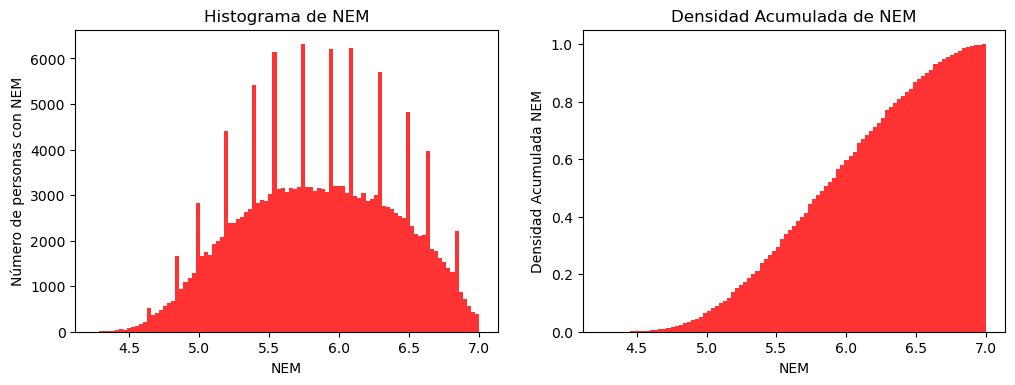

In [11]:
# histograma y distribución de probabilidad empírica
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(df['NEM'], bins=95, alpha=0.8, color='red')
ax[0].set_xlabel('NEM'); ax[0].set_ylabel('Número de personas con NEM'); ax[0].set_title('Histograma de NEM');

# Distribución de probabilidad empírica
ax[1].hist(df['NEM'], bins=95, cumulative=True, density=True, alpha=0.8, color='red')
ax[1].set_xlabel('NEM'); ax[1].set_ylabel('Densidad Acumulada NEM'); ax[1].set_title('Densidad Acumulada de NEM');

### Característica particular
<p>Como se puede apreciar el histograma tiene forma de Campana, pero como se puede ver, lo que comienza lentamente con notas cercanas al 4.25, finalmente termina con una densidad más alta para la nota 7.0.</p>
<p>Si excluimos a los colegios particulares, el histograma luce más parejo, y es que los colegios particulares pagados, tienen una media mucho mayor al resto de colegios.</p>

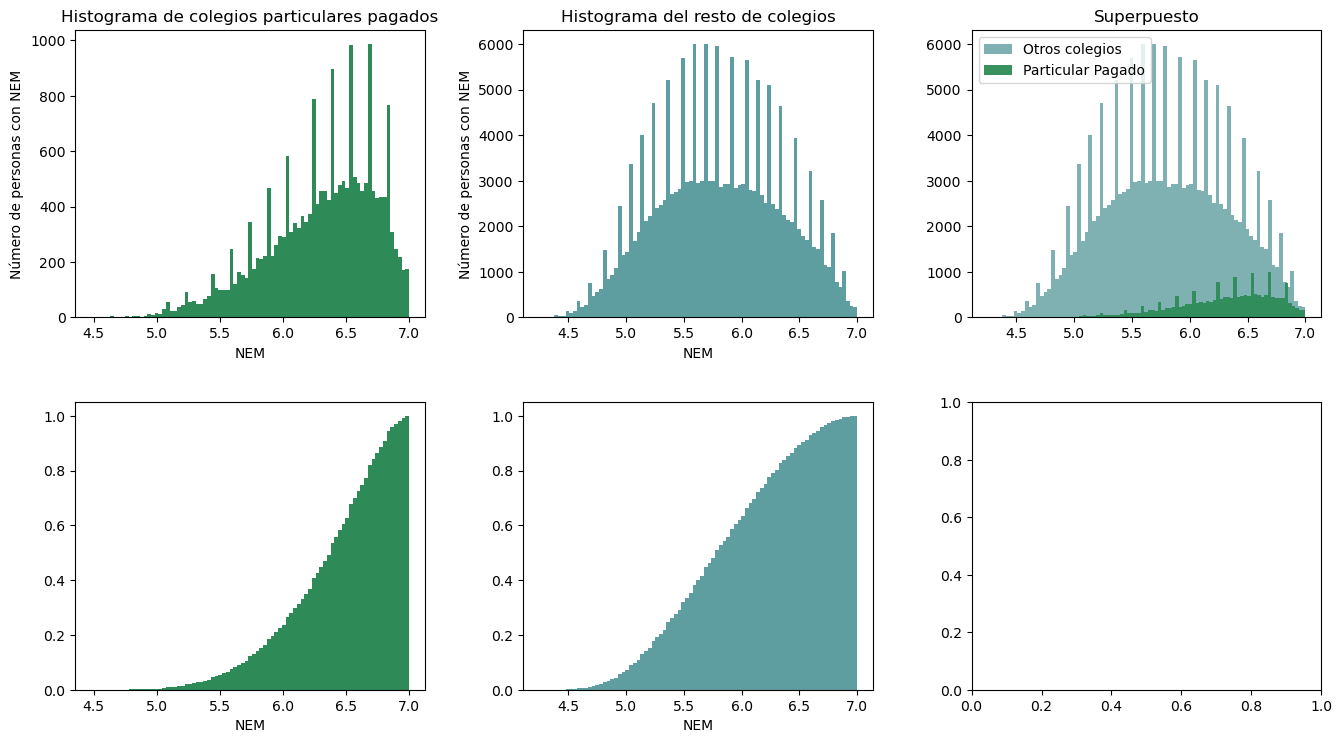

In [12]:
# config figura
fig, ax = plt.subplots(2, 3, figsize=(14, 8))
fig.tight_layout(pad=4.0)

# Filtramos colegios particular pagado
dfParticularPagado = df[df['COD_DEPE'] == 4]
dfResto = df[df['COD_DEPE'] != 4]

# Histograma
ax[0,0].hist(dfParticularPagado['NEM'], bins=85, color='seagreen')
ax[0,0].set_xlabel('NEM'); ax[0,0].set_ylabel('Número de personas con NEM'); ax[0,0].set_title('Histograma de colegios particulares pagados');

ax[0,1].hist(dfResto['NEM'], bins=85, color='cadetblue')
ax[0,1].set_xlabel('NEM');  ax[0,1].set_ylabel('Número de personas con NEM'); ax[0,1].set_title('Histograma del resto de colegios');


# Densidad acumulada
ax[1,0].hist(dfParticularPagado['NEM'], bins=85, cumulative=True, density=True, color='seagreen')
ax[1,0].set_xlabel('NEM');

ax[1,1].hist(dfResto['NEM'], bins=85, cumulative=True, density=True, color='cadetblue')
ax[1,1].set_xlabel('NEM');

# Superpuesto
ax[0,2].set_title('Superpuesto')
ax[0,2].hist(dfResto['NEM'], bins=85, color='cadetblue', alpha=0.8);
ax[0,2].hist(dfParticularPagado['NEM'], bins=85, color='seagreen', alpha=0.95);
ax[0,2].legend(['Otros colegios', 'Particular Pagado']);

In [13]:
dfParticularPagado['NEM'].describe()

count    20356.000000
mean         6.305229
std          0.427482
min          4.480000
25%          6.030000
50%          6.380000
75%          6.650000
max          7.000000
Name: NEM, dtype: float64

### 2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

In [14]:
def select_N_data(df=df,N=1000):
    """
    Parámetros de entrada:
    df: dataframe con los datos
    N: número de datos a seleccionar
    Retorna un dataframe con N datos aleatorios 
    """
    return df.sample(N)

def get_stats_NEM(df=df):
    """
    Parámetros de entrada:
    df: dataframe con los datos
    Retorna mean, var, skew, kurtosis
    """
    return df['NEM'].mean(), df['NEM'].var(), stats.skew(df['NEM']), stats.kurtosis(df['NEM'])

### Ejemplo para sacar los datos 1 vez

In [15]:
random_data = select_N_data(df=df,N=100)
r_mean, r_var, r_skew, r_kurt = get_stats_NEM(df=random_data)
print('Promedio: ', r_mean)
print('Varianza: ', r_var)
print('Asimetria: ', r_skew)
print('Curtosis: ', r_kurt)

Promedio:  5.903300000000001
Varianza:  0.3181597070707071
Asimetria:  -0.33792385054198953
Curtosis:  -0.6503266822332154


### Ejemplo para sacar los datos N veces y graficar

In [16]:
N_test = 500 # Max 500 * 10 = 5.000 ; máximo de datos 200.000
it= 10 # iteraciones
arr_mean = []
arr_var = []
arr_skew = []
arr_kurt = []

for i in range(N_test):
    random_data = select_N_data(df=df,N=it*i)
    r_mean, r_var, r_skew, r_kurt = get_stats_NEM(df=random_data);
    arr_mean.append(r_mean); arr_var.append(r_var); arr_skew.append(r_skew); arr_kurt.append(r_kurt);

c:\Users\darko\Miniconda3\envs\myenv\lib\site-packages\scipy\stats\_stats_py.py:1340: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
c:\Users\darko\Miniconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\darko\Miniconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\darko\Miniconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\darko\Miniconda3\envs\myenv\lib\site-packages\scipy\stats\_stats_py.py:1452: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)


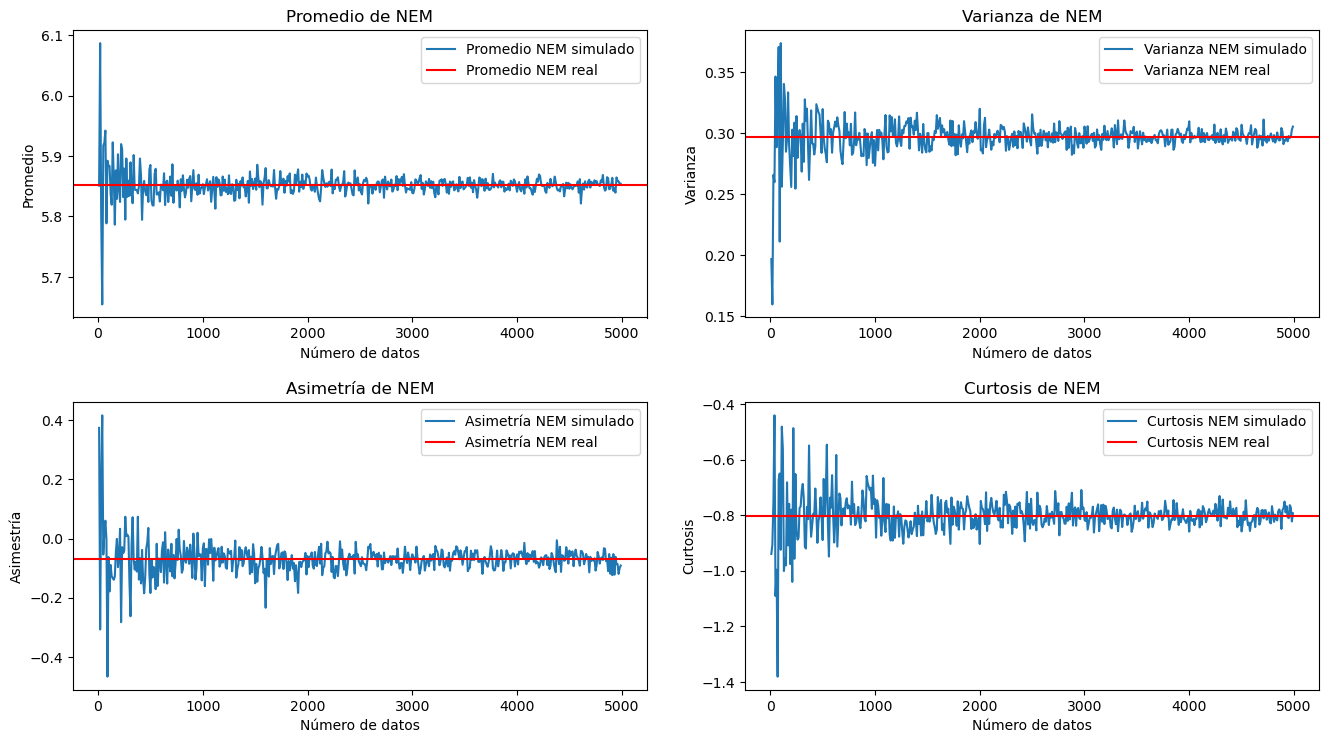

In [17]:
# graficamos
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout(pad=4.0)
n_range = np.arange(0, N_test*it, 10)

# Sección 1: Promedio de NEM (sup, izq)
ax[0,0].plot(n_range, arr_mean)
ax[0,0].set_xlabel('Número de datos'); ax[0,0].set_ylabel('Promedio'); ax[0,0].set_title('Promedio de NEM');
ax[0,0].axhline(y=prom, color='r', linestyle='-')
ax[0,0].legend(['Promedio NEM simulado', 'Promedio NEM real'])

# Sección 2: Varianza de NEM (sup, der)
ax[0,1].plot(n_range, arr_var)
ax[0,1].set_xlabel('Número de datos'); ax[0,1].set_ylabel('Varianza'); ax[0,1].set_title('Varianza de NEM');
ax[0,1].axhline(y=var, color='r', linestyle='-')
ax[0,1].legend(['Varianza NEM simulado', 'Varianza NEM real'])

# Sección 3: Asimetria de NEM (inf, izq)
ax[1,0].plot(n_range, arr_skew)
ax[1,0].set_xlabel('Número de datos'); ax[1,0].set_ylabel('Asimestría'); ax[1,0].set_title('Asimetría de NEM');
ax[1,0].axhline(y=asim, color='r', linestyle='-')
ax[1,0].legend(['Asimetría NEM simulado', 'Asimetría NEM real'])

# Sección 4: Curtosis de NEM (inf, der)
ax[1,1].plot(n_range, arr_kurt)
ax[1,1].set_xlabel('Número de datos'); ax[1,1].set_ylabel('Curtosis'); ax[1,1].set_title('Curtosis de NEM');
ax[1,1].axhline(y=curtos, color='r', linestyle='-');
ax[1,1].legend(['Curtosis NEM simulado', 'Curtosis NEM real']);

<p>La ley de los grandes números es un teorema fundamental de la teoría de la probabilidad que indica que si repetimos muchas veces (tendiendo al infinito) un mismo experimento, la frecuencia de que suceda un cierto evento tiende a ser una constante. Evidentemente este dataset es finito pero podemos ver una clara convergencia de los valores, en donde en todos los casos, cerca de las 3 mil iteraciones ya parecen acercarse al valor real calculado. Mientras más datos consideremos para estos cálculos y/o mayor sea la cantidad de iteraciones que apliquemos, debería tender con mucha más fuerza al valor real. Recordar que son un total de 200 mil datos y con cerca de 3 mil toma valores cercanos a los reales.</p>

### 3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

### Ejemplo grupos Equitativos (4 grupos) de tamaño 51925

In [18]:
N_groups = 51925+1

# Lo repartimos en 4 grupos dado que tenemos 207702 datos : 207702/4 = 51925+1 = 51926
# 51926 * 2 = 103852
# 51926 * 3 = 155778
# 51926 * 4 = 207704

# desordenamos el df
df = df.sample(frac=1).reset_index(drop=True)
df1 = df.iloc[0:N_groups]
df2 = df.iloc[N_groups:N_groups*2]
df3 = df.iloc[N_groups*2:N_groups*3]
df4 = df.iloc[N_groups*3:N_groups*4]

df.head(3)

,RBD,COD_DEPE,AGNO_EGRESO,MRUN,NEM,PERCENTIL,PUESTO_10,PUESTO_30
0,3300,3,2021,5892408,6.63,20,NO,SI
1,3308,3,2021,16375200,5.73,60,NO,NO
2,2200,4,2021,16264958,6.68,40,NO,NO


In [19]:
def hist_NEM(df1, df2, df3, df4, colors):
    """
    Parametros de entrada:
    df1, df2, df3, df4: dataframes con los datos
    colors: lista con los colores para cada dataframe/grupo
    """
    fig, ax = plt.subplots(2, 2, figsize=(14, 8))
    fig.tight_layout(pad=4.0)
    grupo_1_2_3_4 = [df1,df2, df3,df4]

    i=0; j=0; k=0;
    # i : filas
    # j : columnas
    # k : grupo
    for df_1_2_3_4 in grupo_1_2_3_4:
        ax[i,j].hist(df_1_2_3_4['NEM'], bins=85, color= colors[k], alpha=0.8);
        ax[i,j].legend(['Grupo ' + str(k+1)]);
        ax[i,j].set_xlabel('NEM');
        ax[i,j].set_ylabel('Frecuencia');
        ax[i,j].set_title('Histograma NEM '+ str(k+1));
        # iteradores
        k+=1;
        j+=1
        if j==2:
            i+=1
            j=0

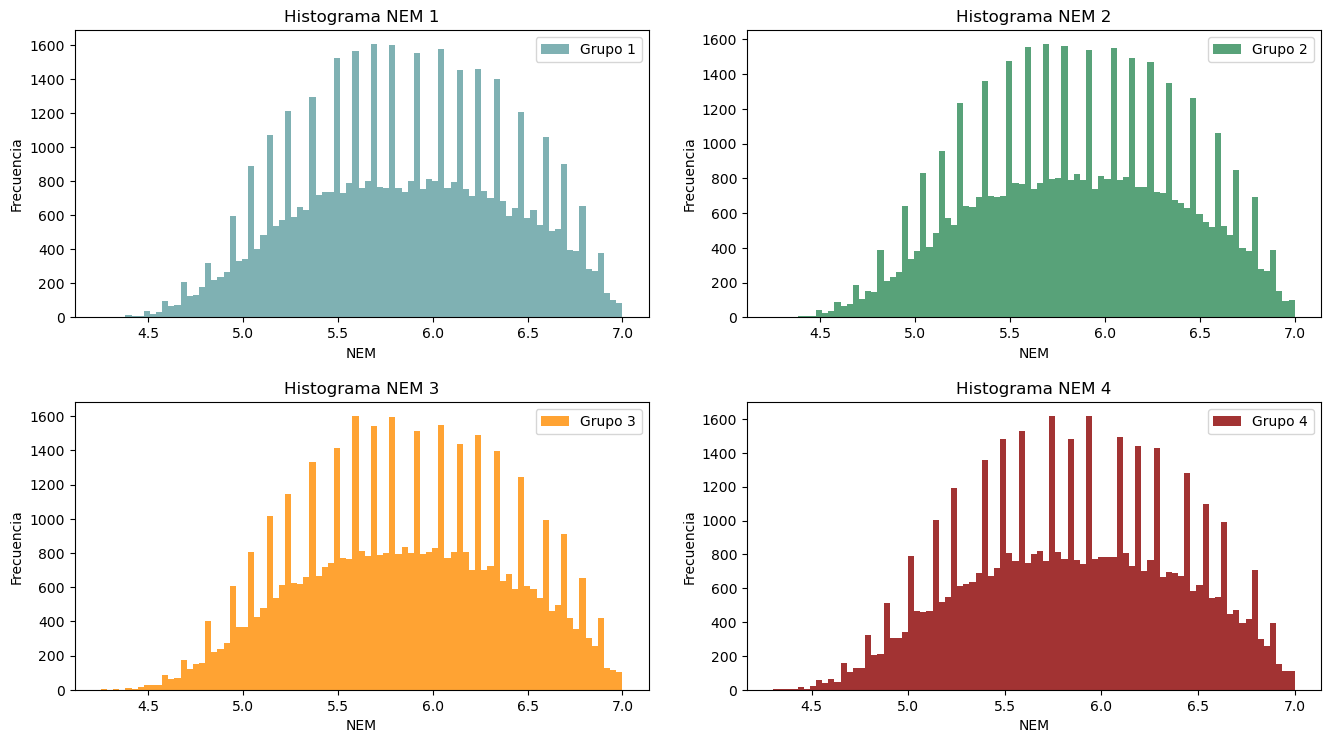

In [20]:
colors = ['cadetblue', 'seagreen', 'darkorange', 'darkred']
hist_NEM(df1, df2, df3, df4, colors)

In [21]:
def hist_NEM_stat(v1,v2,v3,v4, real, types, colors):
    """
    Parametros de entrada:
    v1, v2, v3, v4: valores de las estadísticas
    v1 : [promedio, promedio2...]
    v2 : [varianza, varianza2...]
    v3 : [asimetria, asimetria2...]
    v4 : [curtosis, curtosis2...]
    types: lista con los tipos de estadísticas
    types : ['Promedio', 'Varianza', 'Asimetría', 'Curtosis']
    """
    fig, ax = plt.subplots(2, 2, figsize=(14, 8))
    fig.tight_layout(pad=4.0)
    grupos = [v1,v2, v3,v4]

    i=0; j=0; k=0;
    # i : filas
    # j : columnas
    # k : grupo
    print(v1)
    for v_1_2_3_4 in grupos:
        # ax[i,j].hist(v_1_2_3_4, bins=85, color= colors[k], alpha=0.8);
        ax[i,j].bar(['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4'], grupos[k][0:len(grupos)], color=colors, alpha=0.8);
        ax[i,j].set_xlabel(types[k]);
        ax[i,j].set_ylabel('Frecuencia');
        ax[i,j].set_title('Barras ' + types[k]);
        ax[i,j].axhline(y=real[k], color='darkslateblue', linestyle='-')

        # Acotamos el eje Y para que se vea mejor
        mini = min( grupos[k][0:len(grupos)]);
        maxi = max( grupos[k][0:len(grupos)]);
        if (mini < 0):
            ax[i,j].set_ylim(mini+mini/500, maxi-maxi/500);
        else:
            ax[i,j].set_ylim(mini-mini/500, maxi+maxi/500);

        # add values
        for index, value in enumerate(v_1_2_3_4):
            ax[i,j].text(index, value, round(value,3), color='black', fontweight='bold', ha='center');

        # iteradores
        k+=1;
        j+=1
        if j==2:
            i+=1
            j=0

[5.851142972691908, 5.85091514848053, 5.8510006547779545, 5.854674331715584]


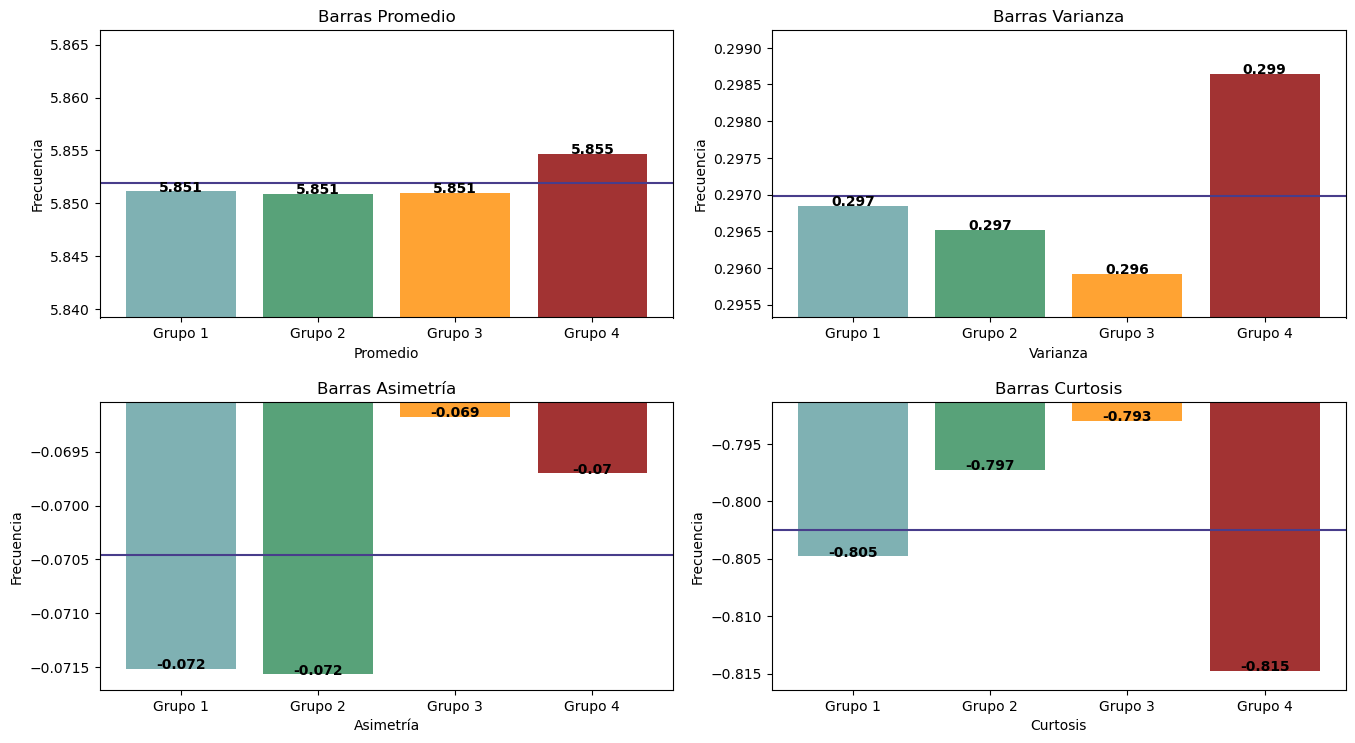

In [22]:
# Calculamos las estadísticas de cada grupo
mean1, var1, skew1, kurt1 = get_stats_NEM(df=df1)
mean2, var2, skew2, kurt2 = get_stats_NEM(df=df2)
mean3, var3, skew3, kurt3 = get_stats_NEM(df=df3)
mean4, var4, skew4, kurt4 = get_stats_NEM(df=df4)

colors = ['cadetblue', 'seagreen', 'darkorange', 'darkred']
hist_NEM_stat([mean1, mean2, mean3, mean4], [var1, var2, var3, var4], [skew1, skew2, skew3, skew4], [kurt1, kurt2, kurt3, kurt4], [prom, var, asim, curtos], ['Promedio', 'Varianza', 'Asimetría', 'Curtosis'], colors);

### Ejemplo grupo pequeño de tamaño 1000

In [23]:
N_groups = 1000+1
# desordena el df
df = df.sample(frac=1).reset_index(drop=True)
# 8 grupos obteniendo valores
df1 = df.iloc[0:N_groups]; df2 = df.iloc[N_groups:N_groups*2]
df3 = df.iloc[N_groups*2:N_groups*3]; df4 = df.iloc[N_groups*3:N_groups*4]

# 8 grupos con sus stats
mean1, var1, skew1, kurt1 = get_stats_NEM(df=df1); mean2, var2, skew2, kurt2 = get_stats_NEM(df=df2)
mean3, var3, skew3, kurt3 = get_stats_NEM(df=df3); mean4, var4, skew4, kurt4 = get_stats_NEM(df=df4)

In [24]:
colors_set_1 = ['firebrick', 'tomato', 'olive', 'dodgerblue']

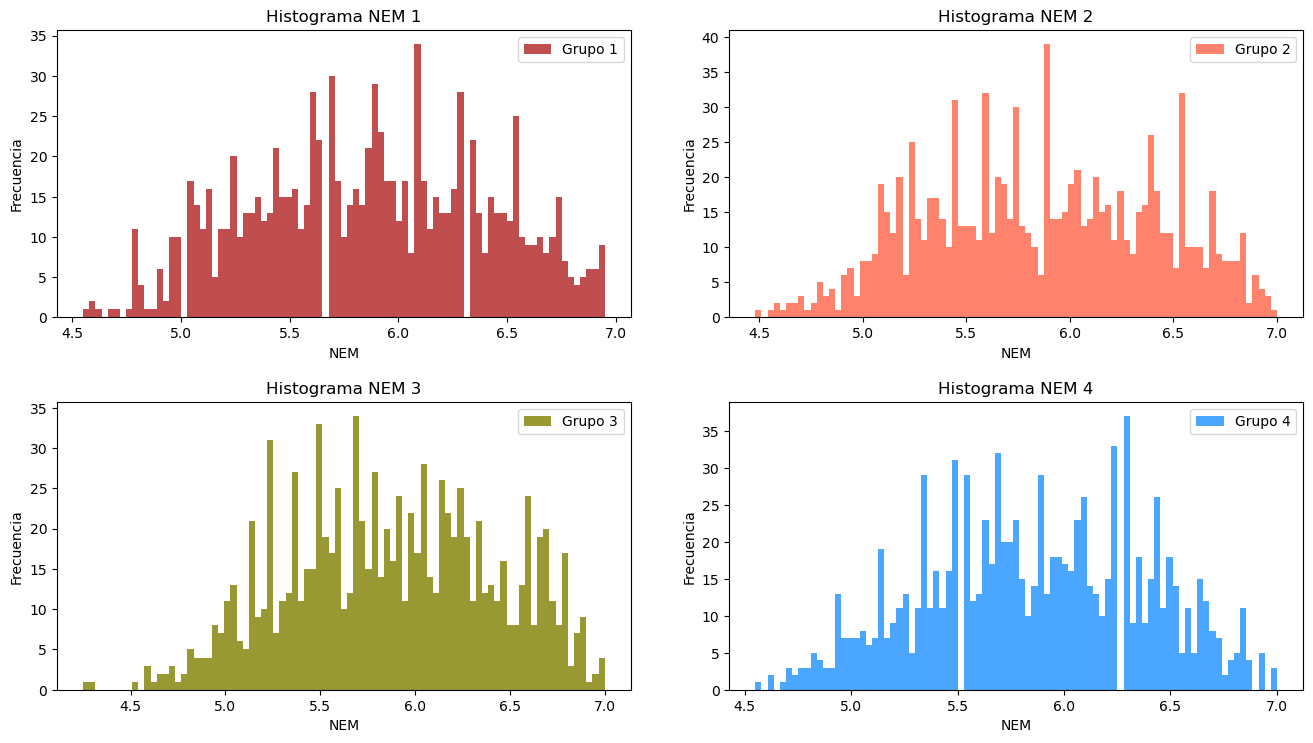

In [25]:
hist_NEM(df1, df2, df3, df4, colors_set_1)

[5.867012987012988, 5.858021978021977, 5.872247752247751, 5.861408591408592]


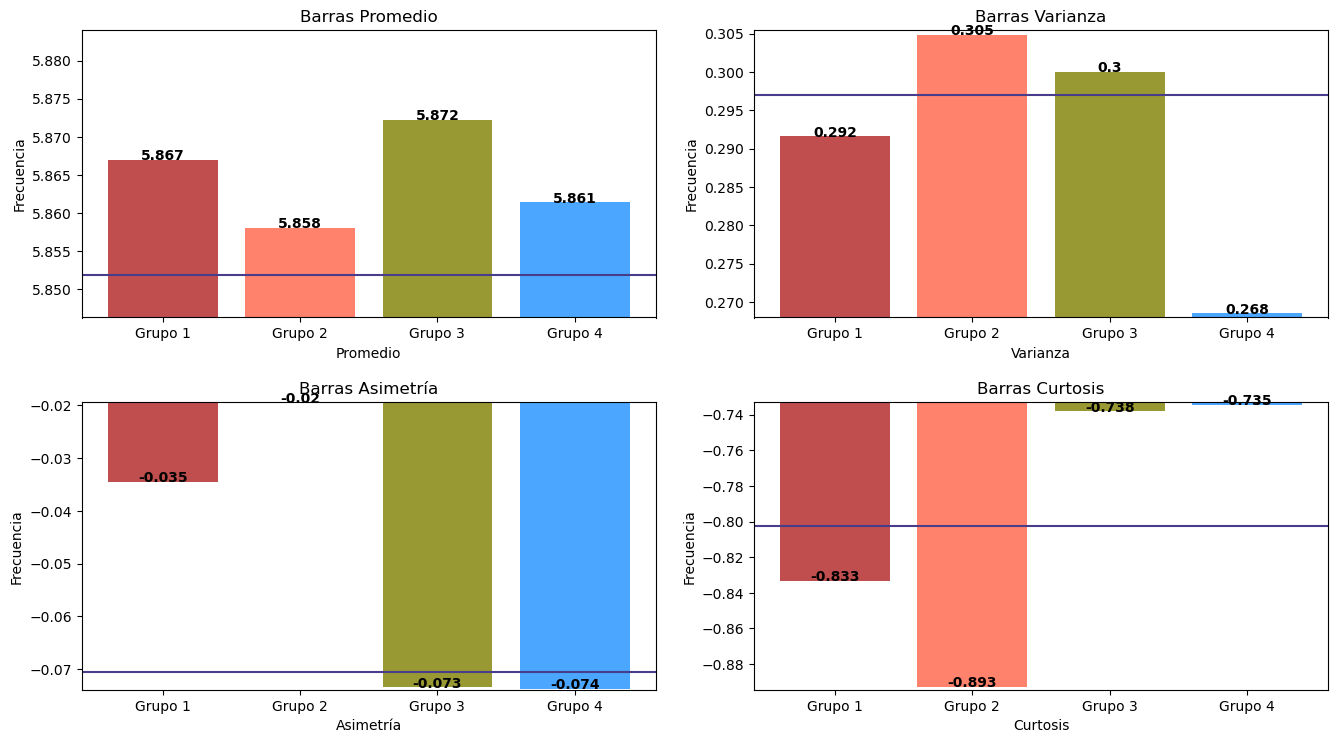

In [26]:
hist_NEM_stat([mean1, mean2, mean3, mean4], [var1, var2, var3, var4], [skew1, skew2, skew3, skew4], [kurt1, kurt2, kurt3, kurt4], [prom, var, asim, curtos], ['Promedio', 'Varianza', 'Asimetría', 'Curtosis'], colors_set_1);

<p>El teorema central del límite (TCL) es una teoría estadística que establece que, dada una muestra aleatoria suficientemente grande de la población, la distribución de las medias muestrales seguirá una distribución normal. Podemos ver como a pesar de considerar solo mil datos tenemos una forma similar a la de una distribución normal.</p>

### 4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.


### Hipótesis
<p>La hipótesis nula es que los datos siguen una <b>distribución normal,</b> ya que:</p>
<ul>
<li>La información es data continua</li>
<li>La información se concentra en el centro y levemente más a la derecha</li>
</ul>
<p>La hipótesis alternativa es que no corresponde a distribución normal</p>
<p><b>Por temas de computo se utilizará un 5% del dataset original, es decir, cerca de 10mil datos para visualizar</b></p>

In [27]:
print("Promedio: ", df['NEM'].mean(), " Punto medio de los datos: ",(df['NEM'].min() + df['NEM'].max())/2)

# desordenamos los datos
df = df.sample(frac=1).reset_index(drop=True)
small_df = df['NEM'].iloc[0:10000]

print("Promedio small_df: ", small_df.mean(), " Punto medio de los datos small_df: ",(small_df.min() + small_df.max())/2)

Promedio:  5.851933250522384  Punto medio de los datos:  5.625
Promedio small_df:  5.846139999999999  Punto medio de los datos small_df:  5.675


<p>Promedio:  <b>5.8519</b>  Punto medio de los datos:  <b>5.625</b></p>
<p>Promedio small_df:  <b>5.8514</b>  Punto medio de los datos small_df:  <b>5.65</b> --- (Estos valores pueden cambiar, revisar la celda de código de arriba)</p>

In [28]:
mu, sigma = small_df.mean(), small_df.std()
norm_s = stats.norm(loc=mu, scale=sigma)
print("mu: ", mu, " sigma: ", sigma)
vec_rango_datos = np.arange(4.2,7,0.05)

mu:  5.846139999999999  sigma:  0.5442952196451967


<p>Para los datos generados: mu=  <b>5.8514</b>, sigma= <b>0.55</b></p>

### Histograma con valores teoricos de la distribución

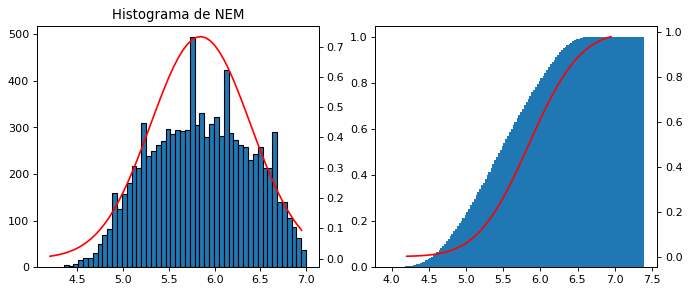

In [29]:
fig, ax = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

# --- Primer gráfico: histograma ---
# Histograma de los datos
ax[0].hist(small_df, edgecolor = 'black', bins = int(50))
# Información del histograma
ax[0].set_title('Histograma de NEM')

# --- Primer gráfico: plot (teórico) ---
ax0 = ax[0].twinx()
vec_distribution = []
for i in vec_rango_datos:
    vec_distribution.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))

ax0.plot(vec_rango_datos,vec_distribution,color='red')


# --- Segundo gráfico: Barras Acumulado ---
# Barras acumuladas información
acum_sort,acum_norm = ecdf(small_df)
# Barras acumuladas
ax[1].bar(acum_sort,acum_norm)

# --- Segundo gráfico: Barras Acumulado ---
ax1 = ax[1].twinx()
vec_acumulado = []
for i in vec_rango_datos:
    vec_acumulado.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))

ax1.plot(vec_rango_datos,vec_acumulado,color='red')
plt.draw();

### Histograma con valores ajustados de la distribución

In [30]:
mu0,sigma0 = stats.norm.fit(small_df)
norm_0 = stats.norm(loc=mu0, scale=sigma0)
print(f" mu0 ={mu0} sigma0 = {sigma0}")

 mu0 =5.846139999999999 sigma0 = 0.5442680042038113


<p>Los valores ajustados son mu= <b>0.58149</b> sigma0= <b>0.5499</b>, practicamente los mismos.</p>

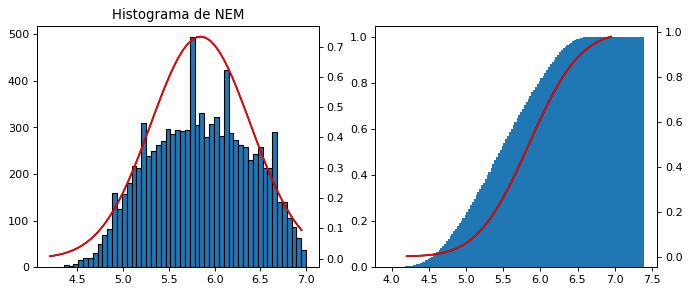

In [31]:
fig, ax = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

# --- Primer gráfico: histograma ---
ax[0].hist(small_df, edgecolor = 'black', bins = int(50))
# Información del histograma
ax[0].set_title('Histograma de NEM')

# --- Primer gráfico: plot (teórico) ---
ax0 = ax[0].twinx()
vec0_distribution = []

for i in vec_rango_datos:
    vec0_distribution.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))

# Plot de la distribución teórica y ajustada
ax0.plot(vec_rango_datos,vec0_distribution,color='black')
ax0.plot(vec_rango_datos,vec_distribution,color='red')

# --- Segundo gráfico: Barras Acumulado ---
ax[1].bar(acum_sort,acum_norm)

ax2 = ax[1].twinx()
vec0_acumulado = []
for i in vec_rango_datos:
    vec0_acumulado.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))

# Plot de la distribución teórica y ajustada acumulada
ax2.plot(vec_rango_datos,vec0_acumulado,color='black')   
ax2.plot(vec_rango_datos,vec_acumulado,color='red')
plt.draw()

### Test de Kolmogorov-Smirnov

<p>Para el set de datos pequeño (el que se visualiza)</p>

In [32]:
print (stats.kstest(small_df, norm_s.cdf))
print (stats.kstest(small_df, norm_0.cdf))
print (stats.kstest(small_df, 'norm'))
print (stats.kstest(small_df, 'norm', args=(mu, sigma)))
print (stats.kstest(small_df, 'norm', args=(mu0, sigma0)))

KstestResult(statistic=0.04160473834252931, pvalue=1.7727432719906602e-15)
KstestResult(statistic=0.04161631147405709, pvalue=1.738883971786526e-15)
KstestResult(statistic=0.9999931931234006, pvalue=0.0)
KstestResult(statistic=0.04160473834252931, pvalue=1.7727432719906602e-15)
KstestResult(statistic=0.04161631147405709, pvalue=1.738883971786526e-15)


<p>Para el set de datos original</p>

In [33]:
mu0_, sigma0_ = stats.norm.fit(df['NEM'])
norm_ = stats.norm(loc=mu0_, scale=sigma0_)
print (stats.kstest(df['NEM'], norm_.cdf))
print (stats.kstest(df['NEM'], 'norm'))
print (stats.kstest(df['NEM'], 'norm', args=(df['NEM'].mean(), df['NEM'].std())))
print (stats.kstest(df['NEM'], 'norm', args=(mu0_, sigma0_)))

KstestResult(statistic=0.04287270694709555, pvalue=0.0)
KstestResult(statistic=0.9999893114742251, pvalue=0.0)
KstestResult(statistic=0.0428721831849076, pvalue=0.0)
KstestResult(statistic=0.04287270694709555, pvalue=0.0)


### Respuesta a la hipótesis

<p>En todos los casos nos da un valor de <b>p</b> demasiado pequeño, siendo <b>p</b> claramente menor que <b>0.05</b> por lo que <b>rechazamos la hipótesis nula</b> y decimos que <b>no está distribuido normal</b></p>

### Para visualizar tomamos como referencia un set de datos de una cantidad de datos similar al original

In [13]:
# creamos un vector que replica una normal
vec_normal = np.random.normal(df['NEM'].mean(), df['NEM'].std(), len(df['NEM']))
# para vec_normal filtramos para notas mayores a 4.25 y menores o iguales a 7.0
vec_normal = vec_normal[(vec_normal >= 4.25) & (vec_normal <= 7.0)]

while (len(vec_normal) <= len(df['NEM'])):
    vec_normal_app = np.random.normal(df['NEM'].mean(), df['NEM'].std(), 1000)
    vec_normal_app = vec_normal_app[(vec_normal_app >= 4.25) & (vec_normal_app <= 7.0)]

    vec_normal = np.append(vec_normal, vec_normal_app)
    print(len(vec_normal), len(df['NEM']))

204683 207702
205668 207702
206651 207702
207630 207702
208614 207702


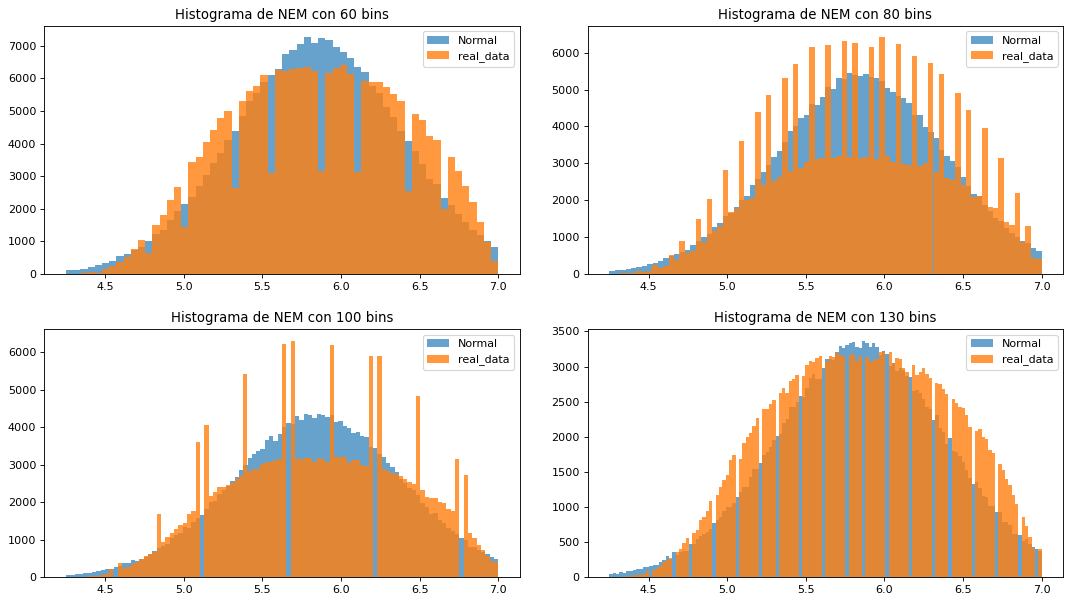

In [30]:
fig, ax = plt.subplots(2, 2,figsize=(14, 8), dpi=80)
fig.tight_layout(pad=3.0)
bins = [60, 80, 100, 130]
for i in range(4):
    ax[i//2,i%2].hist(vec_normal, bins = bins[i], alpha=0.68);
    ax[i//2,i%2].hist(df['NEM'],  bins = bins[i], alpha=0.8);    
    ax[i//2,i%2].set_title(f'Histograma de NEM con {bins[i]} bins')
    ax[i//2,i%2].legend(['Normal', 'real_data'])

### 5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 

In [60]:
import math
import statistics
from IPython.display import display, Math

def calcular_incerteza_media():
    media = statistics.mean(df['NEM'])
    b=100 
    media_all = []
    mse = 0
    for i in range(b):
        dat = np.random.choice(list(df['NEM']),size=len(df['NEM']),replace=True)
        media_pred = statistics.mean(dat)
        media_all.append(media_pred) 
        mse += (media_pred - media)**2
    
    mse = mse/b
    var = statistics.variance(media_all)
    print(f"Varianza de las medias de las muestras bootstrap: {var}")
    print(f"MSE de las medias de las muestras bootstrap: {mse}")
    rango = 1.96*math.sqrt(var) 
    display(Math('%0.2f \pm %0.2f' % (media, rango )))

def calcular_incerteza_stdev():
    stdev = statistics.stdev(df['NEM'])
    b=100 
    stdev_all =[]
    mse = 0
    for i in range(b): 
        dat = np.random.choice(list(df['NEM']),size=len(df['NEM']),replace=True) 
        stdev_pred = statistics.stdev(dat)
        stdev_all.append(stdev_pred)
        mse += ((stdev_pred - stdev)**2)
    
    mse = mse/b   
    var = statistics.variance(stdev_all)
    print(f"Varianza de las desviación estándar de las muestras bootstrap: {var}")
    print(f"MSE de las desviación estándar de las muestras bootstrap: {mse}")
    rango = 1.96*math.sqrt(var) 
    display(Math('%0.2f \pm %0.2f' % (stdev, rango ))) 

def calcular_incerteza_mediana():
    mediana = statistics.median(df['NEM']) # Calculamos la mediana
    b=100 # Número de muestras que tomaremos bootstrap
    mediana_all =[] # Variable que nos servirá para almacenar la mediana de cada muestra
    mse = 0 # Variable que nos servirá para almacenar el MSE
    for i in range(b): # Ciclo que nos permitirá tomar las muestras bootstrap
        dat = np.random.choice(list(df['NEM']),size=len(df['NEM']),replace=True) # Tomamos la muestra bootstrap
        mediana_pred = statistics.median(dat)
        mediana_all.append(mediana_pred)

        mse += ((mediana_pred - mediana)**2)
    
    mse = mse/b  
    var = statistics.variance(mediana_all) # Calculamos la varianza de las medianas de las muestras bootstrap
    print(f"Varianza de las medianas de las muestras bootstrap: {var}")
    print(f"MSE de las medianas de las muestras bootstrap: {mse}")
    rango = 1.96*math.sqrt(var) # Calculamos para un alpha = 0.05 el rango de confianza, en este caso 95% de confianza, por lo que 1.96 es el valor sacado de la tabla de distribución normal
    display(Math('%0.2f \pm %0.2f' % (mediana, rango ))) # Imprimimos el resultado de la mediana y el rango de confianza

    

### Respuesta 5. incerteza media

In [52]:
# media, stdev y mediana
print(f"Media: {df['NEM'].mean()}, Desviación estándar: {df['NEM'].std()}, Mediana: {df['NEM'].median()}")

Media: 5.851933250522383, Desviación estándar: 0.5449585892079092, Mediana: 5.85


In [46]:
calcular_incerteza_media()

Varianza de las medias de las muestras bootstrap: 1.4992266836633595e-06
MSE de las medias de las muestras bootstrap: 1.5367756680424386e-06


<IPython.core.display.Math object>

### Respuesta 5. incerteza stdev

In [57]:
calcular_incerteza_stdev()

Varianza de las desviación estándar de las muestras bootstrap: 3.5671833085312085e-07
MSE de las desviación estándar de las muestras bootstrap: 3.5889943699531965e-07


<IPython.core.display.Math object>

### Respuesta 5. incerteza mediana

In [61]:
calcular_incerteza_mediana()

Varianza de las medianas de las muestras bootstrap: 0.0
MSE de las medianas de las muestras bootstrap: 0.0


<IPython.core.display.Math object>

### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 
